In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

random.seed(0)
np.random.seed(0)

In [2]:
data = pd.read_csv('data.txt',header=None,names=['x','y'],delim_whitespace=True)

In [3]:
data.head()

,x,y
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565


<AxesSubplot:xlabel='x', ylabel='y'>

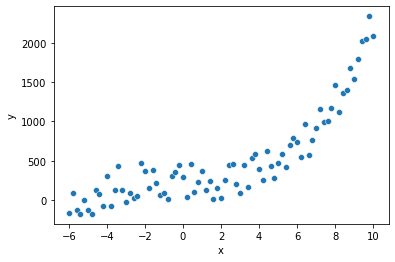

In [4]:
sns.scatterplot(x='x',y='y',data=data)

In [5]:
from sklearn.model_selection import KFold

In [6]:
X=data['x'].to_numpy()
Y=data['y'].to_numpy()
kfold = KFold(n_splits=10)
trainX=[]
trainY=[]
testX=[]
testY=[]

In [7]:
for train_index, test_index in kfold.split(X):
    trainX.append(X[train_index])
    testX.append(X[test_index])
    trainY.append(Y[train_index])
    testY.append(Y[test_index]) 

In [8]:
stdTrainX=[]
stdTestX=[]
stdTrainY=[]
stdTestY=[]
for i in range(10):
    stdTrainX.append((trainX[i]-np.mean(trainX[i]))/np.std(trainX[i]))
    stdTrainY.append((trainY[i]-np.mean(trainY[i]))/np.std(trainY[i]))
    stdTestX.append((testX[i]-np.mean(testX[i]))/np.std(testX[i]))
    stdTestY.append((testY[i]-np.mean(testY[i]))/np.std(testY[i]))

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [29]:
def computeCost(X,y,weights):
    n = len(y);
    predictions = X.dot(weights)
    sq_err = (predictions-y)**2;
    return np.mean(sq_err)

In [25]:
def computeStdCost(X,y,weights):
    n = len(y);
    predictions = X.dot(weights)
    sq_err = (predictions-y)**2;
    return np.std(sq_err)

In [12]:
def matForm(X,degree):
    for i in range(degree):
        exp = i+1
        arr = np.power(X,exp)
        if(i==0):
            modArr = arr
        else:
            modArr = np.column_stack((NX,arr))
        NX = modArr
    return NX

In [53]:
def matToAddOnesBefore(X,degree):
    NX = np.ones((X.shape[0],1))
    for i in range(degree):
        exp = i+1
        arr = np.power(X,exp)
        modArr = np.column_stack((NX,arr))
        NX = modArr
    return NX

In [13]:
def computeModels(degree):
    model_weights=[]
    for ind in range(10):
        Xtrain = matForm(stdTrainX[ind].reshape(-1,1),degree)
        Xtest = matForm(stdTestX[ind].reshape(-1,1),degree)
        cmodel = SGDRegressor(max_iter=1500)
        cmodel.fit(Xtrain,stdTrainY[ind])
        pred = cmodel.predict(Xtest)
        weight=[]
        for item in cmodel.intercept_:
            weight.append(item)
        for item in (cmodel.coef_):
            weight.append(item)
        print(len(weight))
        print(weight)
        model_weights.append(weight)
    return model_weights

In [44]:
def computeErrorTerms(degree,nthModel,weight_list):
    modelNo = nthModel+1
    label = 'hypothesis'+str(modelNo)
    title = 'Hypothesis'+str(modelNo)
    plt.figure(figsize=(12,8))
    train_mean_err_list=[]
    test_mean_err_list=[]
    train_std_err_list=[]
    test_std_err_list=[]
    for i in range(10):
#         Xtrain = matForm(stdTrainX[i].reshape(-1,1),degree)
#         Xtest = matForm(stdTestX[i].reshape(-1,1),degree)
#         predTrain = models[nthModel][i].predict(Xtrain)
#         predTest = models[nthModel][i].predict(Xtest)
        weights = np.array(weight_list[i]).reshape((degree+1,1))
        print(weights.shape)
        train_err = computeCost(matToAddOnesBefore(stdTrainX[i].reshape(-1,1),degree),stdTrainY[i].reshape(len(stdTrainY[i]),1),weights)
        test_err = computeCost(matForm2(stdTestX[i].reshape(-1,1),degree),stdTestY[i].reshape(len(stdTestY[i]),1),weights)
        train_std_err = computeStdCost(matForm2(stdTrainX[i].reshape(-1,1),degree),stdTrainY[i].reshape(len(stdTrainY[i]),1),weights)
        test_std_err = computeCost(matForm2(stdTestX[i].reshape(-1,1),degree),stdTestY[i].reshape(len(stdTestY[i]),1),weights)
        train_mean_err_list.append(train_err)
        test_mean_err_list.append(test_err)
        train_std_err_list.append(train_std_err/np.sqrt(10))
        test_std_err_list.append(test_std_err/np.sqrt(10))
        print("mean train error : ",train_err)
        print("std train error : ",train_std_err)
        print("mean test error : ",test_err)
        print("std test error : ",test_std_err)
        print("\n")
      
    print("\n\n")
    ind=[1,2,3,4,5,6,7,8,9,10]
    plt.subplot(1,2,1)
    plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
    plt.xlabel(label)
    plt.ylabel('train mean error')
    plt.subplot(1,2,2)
    plt.plot(ind,test_mean_err_list,'g')
    plt.errorbar(x=ind,y=test_mean_err_list,yerr=test_std_err_list)
    plt.xlabel(label)
    plt.ylabel('test mean error')
    plt.suptitle(title)
    plt.show()

    min_val = min(train_mean_err_list)
    min_ind = train_mean_err_list.index(min_val)
    print("min training error ",min_val," at index",min_ind+1,"for Hypothesis ",modelNo)
    plt.scatter(stdTrainX[min_ind],stdTrainY[min_ind])
    X_Poly = matForm2(stdTrainX[min_ind].reshape(-1,1),degree)
    pred = X_Poly.dot(np.array(weight_list[min_ind]).reshape(degree+1,1))
    plt.plot(stdTrainX[min_ind],pred,'r')
    

In [45]:
model_weights=computeModels(degree=1)
print(model_weights)

2
[-0.00032424740530952157, 0.7856063060924354]
2
[-0.00010512850667447463, 0.7926905917084482]
2
[0.00013769082387162884, 0.7966429146760684]
2
[0.0009728840234222831, 0.7952666849346377]
2
[-6.969356234658316e-06, 0.8065367726769703]
2
[0.0009392933765659679, 0.8118937689567725]
2
[0.0004937757454069418, 0.8187015411523929]
2
[0.00040310264344500086, 0.8096310134277317]
2
[-0.0008943307855192536, 0.7717911891414533]
2
[0.0006956130039848902, 0.7822632256284586]
[[-0.00032424740530952157, 0.7856063060924354], [-0.00010512850667447463, 0.7926905917084482], [0.00013769082387162884, 0.7966429146760684], [0.0009728840234222831, 0.7952666849346377], [-6.969356234658316e-06, 0.8065367726769703], [0.0009392933765659679, 0.8118937689567725], [0.0004937757454069418, 0.8187015411523929], [0.00040310264344500086, 0.8096310134277317], [-0.0008943307855192536, 0.7717911891414533], [0.0006956130039848902, 0.7822632256284586]]


(2, 1)
mean train error :  0.31898198901036484
std train error :  0.49687150786466205
mean test error :  1.0349691738355724
std test error :  1.0349691738355724


(2, 1)
mean train error :  0.2998265446345482
std train error :  0.49431869545390805
mean test error :  1.4855854361043601
std test error :  1.4855854361043601


(2, 1)
mean train error :  0.30041455109023507
std train error :  0.49638987658230915
mean test error :  1.4417180496371
std test error :  1.4417180496371


(2, 1)
mean train error :  0.3042444953135317
std train error :  0.49910470849769306
mean test error :  0.911778944744084
std test error :  0.911778944744084


(2, 1)
mean train error :  0.2832981960596626
std train error :  0.4879323406401006
mean test error :  2.385328072256722
std test error :  2.385328072256722


(2, 1)
mean train error :  0.27418347929577647
std train error :  0.4570378168363662
mean test error :  1.5254018221492753
std test error :  1.5254018221492753


(2, 1)
mean train error :  0.26446314

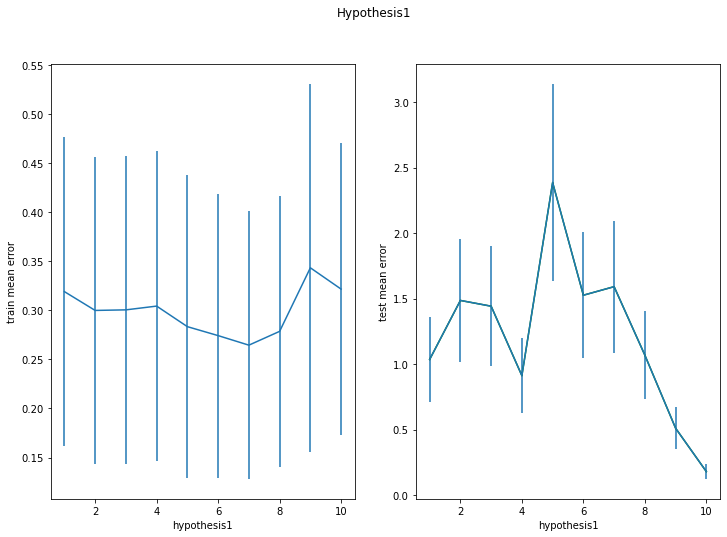

min training error  0.2644631415084928  at index 7 for Hypothesis  1


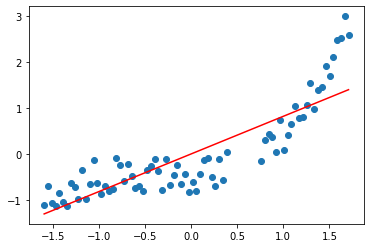

In [46]:
computeErrorTerms(1,0,model_weights)

In [47]:
model_weights=computeModels(degree=3)
print(model_weights)

4
[-0.3282546372602952, 0.24239732359008437, 0.3875034778425771, 0.31590538020263825]
4
[-0.31668771318477884, 0.28928937237629093, 0.44115388062147787, 0.309826110193848]
4
[-0.28948130231201474, 0.2517044718863061, 0.4252471896264671, 0.3535040821876564]
4
[-0.2800060690172059, 0.2281263727012489, 0.3938142705221422, 0.3827102542764827]
4
[-0.23469463852928593, 0.22403390498629783, 0.31503306273503634, 0.3912005436538264]
4
[-0.2676536420078295, 0.21416083799931945, 0.3070496280619046, 0.37851975898372775]
4
[-0.271477243848548, 0.18673641221106224, 0.2730509013339417, 0.3636780734342286]
4
[-0.25024858870880423, 0.15247528979921804, 0.2341252524613807, 0.342800062757456]
4
[-0.21973893163953728, 0.104239911491165, 0.2096086930316321, 0.33369428754528097]
4
[-0.16799546659846057, 0.18118431895417056, 0.22234528007151633, 0.3572260916661898]
[[-0.3282546372602952, 0.24239732359008437, 0.3875034778425771, 0.31590538020263825], [-0.31668771318477884, 0.28928937237629093, 0.4411538806214

(4, 1)
mean train error :  0.08650162803618791
std train error :  0.10176280951569086
mean test error :  0.8432757431367944
std test error :  0.8432757431367944


(4, 1)
mean train error :  0.07422369544101508
std train error :  0.08030536993976728
mean test error :  2.055240222575555
std test error :  2.055240222575555


(4, 1)
mean train error :  0.07617712586951578
std train error :  0.08389865496936094
mean test error :  2.2676912664274775
std test error :  2.2676912664274775


(4, 1)
mean train error :  0.07698233367389784
std train error :  0.08290133323083897
mean test error :  1.2606061357858587
std test error :  1.2606061357858587


(4, 1)
mean train error :  0.08374453384360714
std train error :  0.09746955852718613
mean test error :  2.8391510440337067
std test error :  2.8391510440337067


(4, 1)
mean train error :  0.07887044764066457
std train error :  0.08648523647911034
mean test error :  1.3111797415543955
std test error :  1.3111797415543955


(4, 1)
mean train error 

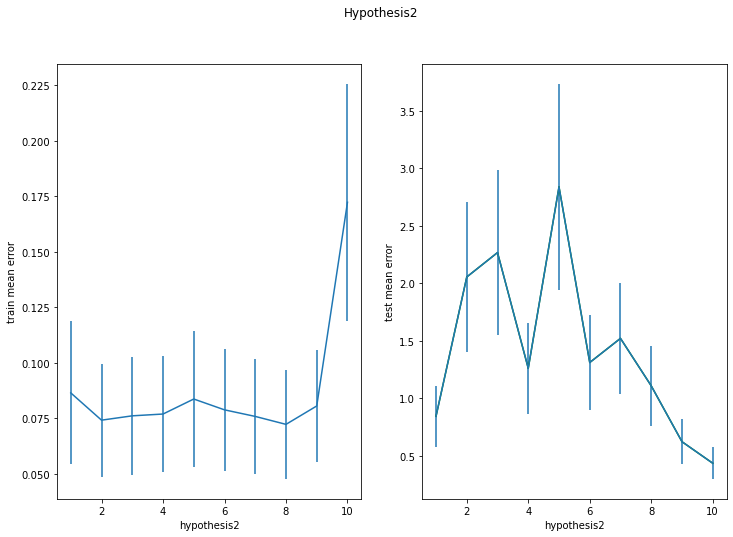

min training error  0.07233509398704663  at index 8 for Hypothesis  2


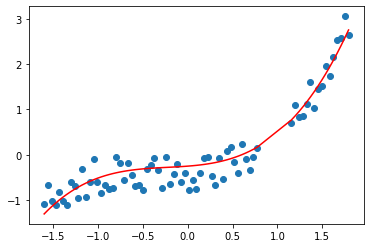

In [48]:
computeErrorTerms(3,1,model_weights)

In [49]:
model_weights=computeModels(degree=5)
print(model_weights)

6
[-0.3030911549513966, 0.28920215595209764, 0.050886176995631506, 0.2154909675220104, 0.15922721105967003, 0.028714492403789614]
6
[-0.2731068671047031, 0.2658780280585397, 0.03909611532143104, 0.2226332717617679, 0.18204556080258927, 0.06499795428964424]
6
[-0.2781096514012736, 0.26692776771043875, 0.05316320322668469, 0.2259765680754598, 0.1867547260916154, 0.06509114509656971]
6
[-0.2666302320924858, 0.24524177467545963, 0.04429189206774193, 0.21400543238632824, 0.1894803161077891, 0.07268464204445914]
6
[-0.2422018171831967, 0.23292163912217861, 0.005355975864427622, 0.20596136543405466, 0.1746543025366668, 0.08018121669180853]
6
[-0.2632984486189927, 0.23862887181493553, 0.021619251300739512, 0.18691485237649863, 0.15141406907853822, 0.08060870804817231]
6
[-0.27426152986836383, 0.22745552080706744, 0.03169462296733462, 0.1883820723394173, 0.12985127814982353, 0.06598086783277411]
6
[-0.27303781496148116, 0.19580540105964603, 0.023993586117566426, 0.18356947001993626, 0.106064905

(6, 1)
mean train error :  0.083826311968293
std train error :  0.09368790662604175
mean test error :  0.8871625732336182
std test error :  0.8871625732336182


(6, 1)
mean train error :  0.07797977653240795
std train error :  0.09720795063656751
mean test error :  2.1809412312331315
std test error :  2.1809412312331315


(6, 1)
mean train error :  0.07191628978310534
std train error :  0.08445558915740037
mean test error :  2.522213417964643
std test error :  2.522213417964643


(6, 1)
mean train error :  0.07450769573982229
std train error :  0.08261979440783679
mean test error :  1.237073355683719
std test error :  1.237073355683719


(6, 1)
mean train error :  0.07045824664403821
std train error :  0.07987589264262727
mean test error :  2.973620378684112
std test error :  2.973620378684112


(6, 1)
mean train error :  0.07155840115594085
std train error :  0.08226140156552299
mean test error :  1.279807557857557
std test error :  1.279807557857557


(6, 1)
mean train error :  0.070

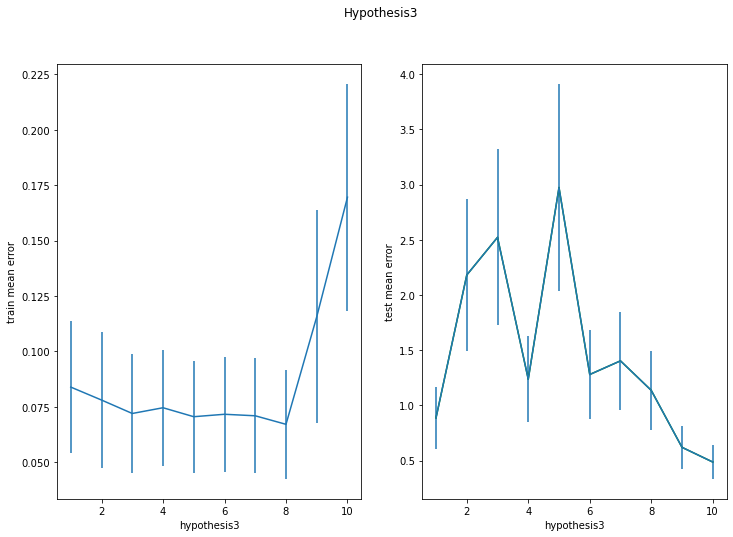

min training error  0.06702103446415045  at index 8 for Hypothesis  3


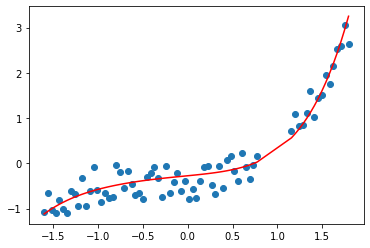

In [50]:
computeErrorTerms(5,2,model_weights)

In [51]:
model_weights=computeModels(degree=50)
print(model_weights)

51
[103543678502.49017, 267385252358.69104, 319979304137.05, 232861012255.23462, 655516005769.9216, 106116335441.2508, 1383343413136.3667, -344782704630.5421, 3035295303393.885, -1785049442271.92, 6831720225301.116, -6068336871975.426, 15614480721667.441, -18286296233869.05, 36023885300812.586, -52268691913869.516, 83593526823251.45, -145257338315860.38, 194655899646813.94, -396854344990323.0, 454070812733976.9, -1071901687255374.1, 1059472061718267.2, -2870932596938958.0, 2469021591072095.5, -7637600895563127.0, 5737682532928558.0, -2.0199138108919036e+16, 1.3271458846034946e+16, -5.312547013656275e+16, 3.048452441526356e+16, -1.3894920345952554e+17, 6.933173261754438e+16, -3.612819147472669e+17, 1.554948132949928e+17, -9.332462222744356e+17, 3.418803256500747e+17, -2.3926835578327665e+18, 7.301575278406893e+17, -6.080163732585718e+18, 1.4910835074060234e+18, -1.528445471880626e+19, 2.8229096083047716e+18, -3.790605446729395e+19, 4.5918555432249037e+18, -9.238017546882351e+19, 4.72488

(51, 1)
mean train error :  6.67613833437639e+62
std train error :  3.980956769261399e+63
mean test error :  3.7284189355008047e+59
std test error :  3.7284189355008047e+59


(51, 1)
mean train error :  2.5248551464119513e+72
std train error :  1.9420105194775992e+73
mean test error :  1.2139471047483636e+64
std test error :  1.2139471047483636e+64


(51, 1)
mean train error :  2.1703328394534017e+66
std train error :  1.677151534842151e+67
mean test error :  5.346355154280481e+60
std test error :  5.346355154280481e+60


(51, 1)
mean train error :  1.1673832197578328e+59
std train error :  7.300885831587374e+59
mean test error :  2.7970605471055114e+57
std test error :  2.7970605471055114e+57


(51, 1)
mean train error :  3.24945952222767e+58
std train error :  2.2934241570735567e+59
mean test error :  3.5202637734149046e+56
std test error :  3.5202637734149046e+56


(51, 1)
mean train error :  1.3717385375833564e+60
std train error :  1.0143323201080073e+61
mean test error :  9.40267

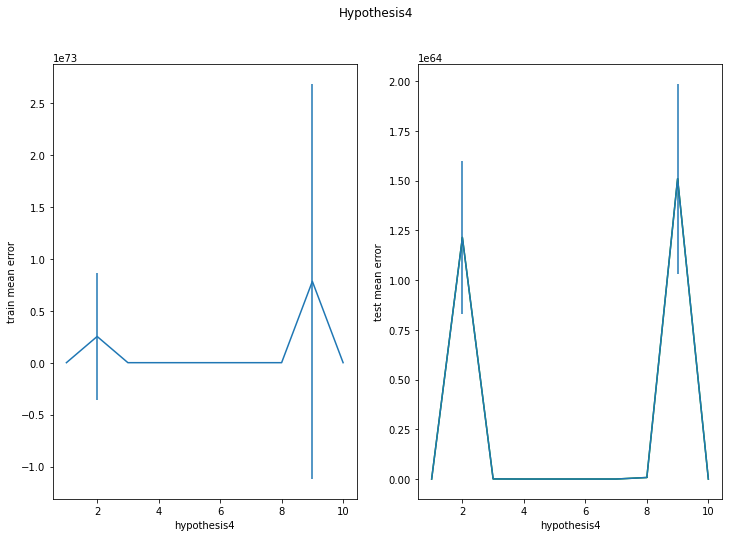

min training error  3.24945952222767e+58  at index 5 for Hypothesis  4


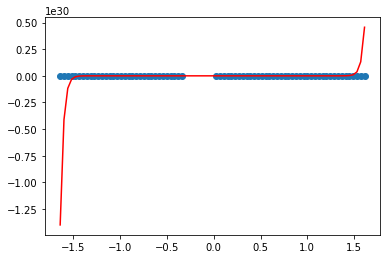

In [52]:
computeErrorTerms(50,3,model_weights)